### **Premier League Club Investement Analysis for an Investment Company(EDA)**

**Domain: Sports**

**Context:**
    
A renowned investment firm usually invest in top-tier sports teams that have potential. The dataset in their possession comprises crucial information about all the clubs that have participated in premier league (assume that it has the data for all clubs). It includes data on the number of goals scored, the number of times they have finished in the top two positions and other relevant details.

**Data:**
Premier League Final Data.csv- : The data set contains information on all the clubs so far participated in all the premier league tournaments.

**Data Dictionary:**

* Club: Name of the football club
* Matches: Number of matches the club has played in the Premier League
* Wins: Number of matches won by the club in the Premier League
* Loss: Number of matches lost by the club in the Premier League
* Draws: Number of matches drawn by the club in the Premier League
* Clean Sheets: Number of matches in which the club has prevented the opposing side from scoring
* Team Launch: Year in which the club was founded
* Winners: Number of times the club has won the Premier League
* Runners-up: Number of times the club has finished as runners-up in the Premier League
* lastplayed_pl: Year in which the team last played in the Premier League

**Project Objective**

The management of the firm aims to invest in one of the top-performing club in the English Premier League. To aid in their decision-making process, the analytics department has been tasked with creating a comprehensive report on the performance of various clubs. However, some of the more established clubs have already been owned by the competitors. As a result, the firm wishes to identify the clubs they can approach and potentially invest to ensure a successful and profitable deal.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Reading the csv file into python

df = pd.read_csv("Premier_League_Data.csv")

### Exploring the data

In [3]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,1Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,2Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,3Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12


Observation:- Upon reviewing above data we note that it consist 11 column, with first column containing club name along with index no. and rest of the column containing data related to club performance in premier league.
There are some null values in Runners-up column. We will deal with it later.

In [4]:
df.tail()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
35,36West Bromwich Albion,494,117,238,139,510,107,1878,NaN,0,Apr-18
36,37West Ham United,1025,343,423,259,1262,266,1895,NaN,0,Apr-23
37,38Wigan Athletic,304,85,143,76,316,73,1932,NaN,0,Apr-13
38,39Wolverhampton Wanderers,334,98,151,85,353,75,1877,0.0,0,Apr-23
39,40Portsmouth,266,79,122,65,292,61,April 1898,NaN,NaN,Apr-10


Observation:- We can see some null values in winners column also and some inconsistencies in TeamLaunch column.

In [5]:
df.shape

(40, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         25 non-null     float64
 9   Runners-up      22 non-null     object 
 10  lastplayed_pl   40 non-null     object 
dtypes: float64(1), int64(6), object(4)
memory usage: 3.6+ KB


There are 40 non-null values in each column, indicating that there are no missing values. However, there are null values in the 'Winners' and 'Runners-up' columns as observed earlier. 

We also notice that the data type for the "Runners-up" column is non-numeric (i.e., object type). To perform any numerical analysis on this column, we will need to convert it to a numeric data type. 

### **Data cleaning**

In [7]:
df['Club'] = df['Club'].str.replace('\d+', '')

In [8]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,1Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,2Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,3Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12


In [9]:
df["Winners"].isnull().sum()

15

In [10]:
df["Winners"].value_counts()

Winners
0.0     18
1.0      3
3.0      1
5.0      1
6.0      1
13.0     1
Name: count, dtype: int64

Obseravtion:- There are 3 clubs won 1 tournament, 1 club won 3 tournament, 1 club won 5 tournaments, 1 club won 6 tournaments, and 1 expectional performing club won 13 tournaments. 
Now there are in total 40 clubs who participated in Premier League and we can see that along the time span of 1992-2022 total 30 winners should be there and which can be calculated from above data. As all 30 winning clubs are present in the data, we can say that data is correct. then we can replace the null values with 0.

In [11]:
df["Winners"].fillna(0, inplace=True)

In [12]:
df["Runners-up"].value_counts()

Runners-up
0    10
1     3
-     3
6     1
4     1
5     1
3     1
7     1
2     1
Name: count, dtype: int64

Observation:- As we can do a simple calculation here for Runner-up for last 30 years, There are 3 clubs who had been runner-up 1 time, 1 club who has been runner-up 6 times, 1 club who has been runner-up 4 times, 1 club who has been runner-up 5 times, 1 club who has been runner-up 3 times, 1 club who has been runner-up 7 times, 1 club who has been runner-up 2 times. So in total we have 3 + 6 + 4 + 5 + 3 + 7 + 2 = 30 runner-up clubs. So we can say that data is correct. then we can replace the null values with 0, and '-' with 0. 

In [13]:
df["Runners-up"].fillna(0, inplace=True)
df["Runners-up"].replace('-', 0, inplace=True)

In [14]:
df["Runners-up"].isnull().any()

False

In [15]:
df['Runners-up'] = pd.to_numeric(df['Runners-up'], errors='coerce')
df['Runners-up'] = df['Runners-up'].astype('Int64')

This code is converting the "Runners-up" column in a pandas DataFrame, df, from an "Object" data type to an "Int64" data type.

The first line uses the pd.to_numeric() function to attempt to convert the "Runners-up" column to a numeric data type. The errors='coerce' argument tells the function to replace any values that cannot be converted to a number with NaN.

The second line uses the .astype() method to convert the "Runners-up" column to an "Int64" data type. The .astype() method is called on the "Runners-up" column of the DataFrame, and the argument "Int64" specifies the desired data type.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         40 non-null     float64
 9   Runners-up      40 non-null     Int64  
 10  lastplayed_pl   40 non-null     object 
dtypes: Int64(1), float64(1), int64(6), object(3)
memory usage: 3.6+ KB


In [17]:
df['TeamLaunch'].value_counts()

TeamLaunch
1878           3
1886           2
1905           2
1874           2
1892           2
1879           2
1884           2
1882           2
1875           2
1895           1
1881           1
1904           1
1932           1
1912           1
1863           1
1877           1
1885           1
1867           1
1889           1
1894           1
1865           1
1902           1
1876           1
1919           1
16 Oct 1878    1
1861           1
Aug 1883       1
1901           1
1899           1
April 1898     1
Name: count, dtype: int64

In [18]:
df['TeamLaunch'] = pd.to_datetime(df['TeamLaunch'], errors='coerce')

df['TeamLaunch'] = df['TeamLaunch'].dt.strftime('%Y')

In [19]:
df['TeamLaunch'].value_counts()

TeamLaunch
1878    3
1886    2
1905    2
1874    2
1892    2
1879    2
1884    2
1882    2
1875    2
1881    1
1889    1
1895    1
1912    1
1932    1
1863    1
1885    1
1867    1
1894    1
1904    1
1865    1
1902    1
1876    1
1919    1
1861    1
1901    1
1899    1
1877    1
Name: count, dtype: int64

In [20]:
df["lastplayed_pl"].value_counts()

lastplayed_pl
Apr-23    19
Apr-22     3
Apr-17     3
Apr-18     3
May-12     2
May-11     1
May-07     1
Apr-01     1
Apr-08     1
Apr-02     1
Apr-15     1
Apr-21     1
Apr-00     1
Apr-13     1
Apr-10     1
Name: count, dtype: int64

In [21]:
df["lastplayed_pl"] = (pd.to_datetime(df["lastplayed_pl"], format = "%b-%y", errors='coerce')).dt.year

In [22]:
df["lastplayed_pl"]

0     2023
1     2023
2     2011
3     2012
4     2012
5     2023
6     2023
7     2022
8     2007
9     2023
10    2001
11    2023
12    2008
13    2023
14    2023
15    2002
16    2023
17    2023
18    2023
19    2023
20    2023
21    2017
22    2023
23    2022
24    2023
25    2017
26    2015
27    2021
28    2000
29    2023
30    2018
31    2017
32    2018
33    2023
34    2022
35    2018
36    2023
37    2013
38    2023
39    2010
Name: lastplayed_pl, dtype: int32

In [23]:
df.describe()

,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,Winners,Runners-up,lastplayed_pl
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.000000
mean,573.750000,215.450000,210.425000,147.875000,769.000000,167.925000,0.750000,0.75,2018.000000
std,358.986519,194.164608,102.132364,88.873632,627.746478,135.561584,2.372384,1.750458,6.876195
min,190.000000,41.000000,85.000000,48.000000,181.000000,45.000000,0.000000,0.0,2000.000000
25%,275.000000,80.500000,127.500000,71.500000,304.500000,66.000000,0.000000,0.0,2014.500000
50%,443.000000,116.500000,193.500000,120.000000,462.000000,104.000000,0.000000,0.0,2022.000000
75%,934.750000,295.750000,263.000000,222.000000,1142.750000,244.250000,0.000000,0.0,2023.000000
max,1182.000000,720.000000,429.000000,329.000000,2229.000000,491.000000,13.000000,7.0,2023.000000


In [24]:
#Team that has won Premier league for 13 times
df[df['Winners'] == df['Winners'].max()]["Club"]

20    21Manchester United
Name: Club, dtype: object

In [25]:
#Team that has won Premier league for 13 times
df[df['Runners-up'] == df['Runners-up'].max()]["Club"]

20    21Manchester United
Name: Club, dtype: object

Manchester United is club with most wins and runners up in premier league.

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

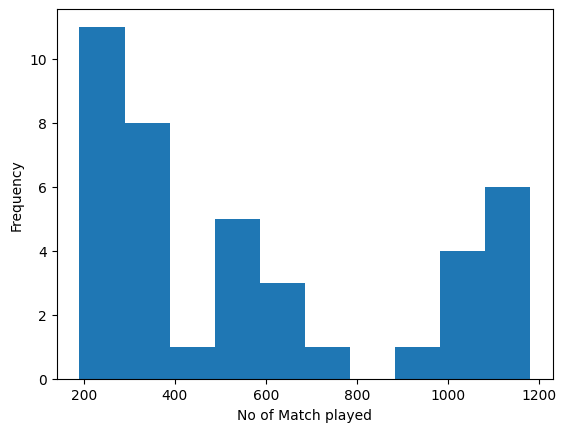

In [27]:
plt.hist(df["Matches Played"])
plt.xlabel("No of Match played")
plt.ylabel("Frequency")
plt.show()

In [28]:
df[df["Matches Played"] <= 900]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
2,3Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011
3,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012
4,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012
5,6Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023
6,7Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023
7,8Burnley,304,83,145,76,300,78,1882,0.0,0,2022
8,9Charlton Athletic,304,93,129,82,342,91,1905,0.0,0,2007
10,11Coventry City,354,99,143,112,387,92,NaN,0.0,0,2001
11,12Crystal Palace,532,153,241,138,576,133,1861,0.0,0,2023
12,13Derby County,266,68,128,70,271,66,1884,0.0,0,2008


In [29]:
df = df[df["Matches Played"] < 900].reset_index(drop=True)

In [30]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,3Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011
1,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012
2,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012
3,6Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023
4,7Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023


In [31]:
df.shape

(29, 11)

In [32]:
df["Winning Rate"] = (df['Win']/df['Matches Played'])*100
df["Loss Rate"] = (df['Loss']/df['Matches Played'])*100
df["Drawn Rate"] = (df['Drawn']/df['Matches Played'])*100
df["Clean Sheets Rate"] = (df['Clean Sheets']/df['Matches Played'])*100

In [33]:
df["Avg goals per match"] = df["Goals"]/df["Matches Played"]
df["Avg goals per match"] = df["Avg goals per match"].round()

In [34]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheets Rate,Avg goals per match
0,3Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0
1,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
2,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0
3,6Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0
4,7Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0


In [35]:
df.tail()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheets Rate,Avg goals per match
24,35Watford,305,73,165,67,310,62,1881,0.0,0,2022,23.934426,54.098361,21.967213,20.327869,1.0
25,36West Bromwich Albion,494,117,238,139,510,107,1878,0.0,0,2018,23.684211,48.178138,28.137652,21.659919,1.0
26,38Wigan Athletic,304,85,143,76,316,73,1932,0.0,0,2013,27.960526,47.039474,25.000000,24.013158,1.0
27,39Wolverhampton Wanderers,334,98,151,85,353,75,1877,0.0,0,2023,29.341317,45.209581,25.449102,22.455090,1.0
28,40Portsmouth,266,79,122,65,292,61,NaN,0.0,0,2010,29.699248,45.864662,24.436090,22.932331,1.0


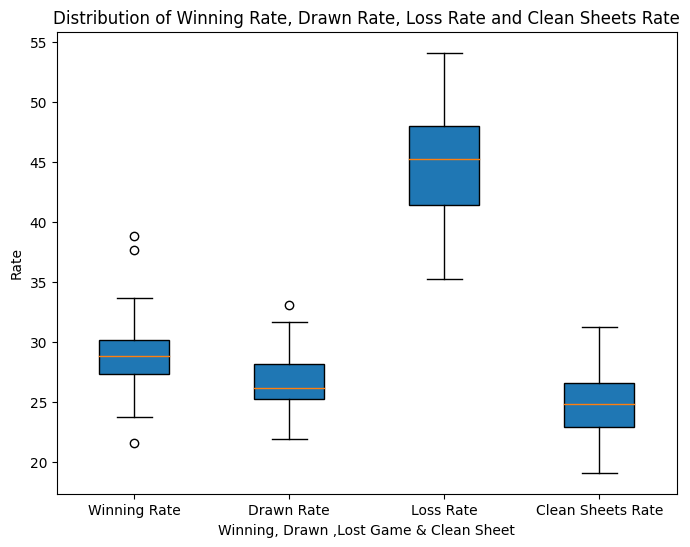

In [36]:
plt.figure(figsize=(8, 6))

# Create the boxplot
boxplot = plt.boxplot([df['Winning Rate'], df['Drawn Rate'], df['Loss Rate'], df['Clean Sheets Rate']], 
                      patch_artist=True,
                      labels=['Winning Rate', 'Drawn Rate', 'Loss Rate', 'Clean Sheets Rate'])

# Set the title and axis labels
plt.title('Distribution of Winning Rate, Drawn Rate, Loss Rate and Clean Sheets Rate')
plt.xlabel('Winning, Drawn ,Lost Game & Clean Sheet')
plt.ylabel('Rate')

# Show the plot
plt.show()

#### Winning Rate

We observe that there are a few outliers in the Winning Rate boxplot, which are located above the upper whisker. It is safe to conclude that these outlier clubs have shown exceptional winning rates compared to the other clubs. Let us identify them ahead.

Also let us identify the club that has least "Winning Rate"

#### Drawn Rate

We observe an outlier in the drawn rate boxplot, indicating that there is one clubs has a much higher drawn rate compared to others. This may not necessarily be a positive indication, as it suggests that the club may struggle to secure wins in their matches. Going further let us identify which club is this.

#### Loss Rate

We can see very clearly that loss rates for these clubs are high compared to winning rate. 

#### Clean Sheet Rate

We see that data for Clean Sheet rate is pretty symmetric.

In [37]:
Q1 = df["Winning Rate"].quantile(0.25)
Q3 = df["Winning Rate"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

highwinningrate = df[(df['Winning Rate'] > upper_bound)]
highwinningrate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheets Rate,Avg goals per match
1,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
12,17Leeds United,574,223,202,149,784,179,1919,0.0,0,2023,38.850174,35.191638,25.958188,31.184669,1.0


In [38]:
lower_bound = Q1 - 1.5 * IQR

lowwinningrate = df[df["Winning Rate"]<lower_bound]
lowwinningrate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheets Rate,Avg goals per match
17,26Hull City,190,41,101,48,181,58,1904,0.0,0,2017,21.578947,53.157895,25.263158,30.526316,1.0


In [39]:
# Highest Drawn Rate
Q1 = df["Drawn Rate"].quantile(0.25)
Q3 = df["Drawn Rate"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

highdrawnrate = df[df["Drawn Rate"] > upper_bound]
highdrawnrate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheets Rate,Avg goals per match
4,7Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0


Brighton & Hove Albion is a club wih highest Drawn rate of 33%.

In [40]:
df["Avg goals per match"].describe()

count    29.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: Avg goals per match, dtype: float64

In [41]:
df["Runners-up"].value_counts()

Runners-up
0    28
1     1
Name: count, dtype: Int64

There is one club who has been runner-up amongst the 29 other clubs.
Lets find that club.

In [42]:
df["Winners"].value_counts()

Winners
0.0    27
1.0     2
Name: count, dtype: int64

There are 2 clubs among 29 other clubs who has won 1 tournament each.

In [43]:
df[(df["Winners"]==1) | (df["Runners-up"]==1)]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheets Rate,Avg goals per match
1,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
13,18Leicester City,642,216,262,164,860,167,1884,1.0,0,2023,33.644860,40.809969,25.545171,26.012461,1.0


So Blackburn Rovers are the 1 time runner-up and 1 time winner but they have last played tournament in 2012.
And Leicester City is the club who has won 1 tournament but they have last played tournament in 2023.

In [44]:
df["lastplayed_pl"].value_counts()

lastplayed_pl
2023    8
2022    3
2017    3
2018    3
2012    2
2011    1
2007    1
2001    1
2008    1
2002    1
2015    1
2021    1
2000    1
2013    1
2010    1
Name: count, dtype: int64

Out of the total 29 teams, eight are currently playing in the Premier League. Since these teams are currently active in the league, it makes sense to prioritize them in our analysis. However, there are also teams that date back as early as 2000. It may be appropriate to assign these teams less weight.

In [45]:
df[(df["lastplayed_pl"]==2023) | (df["lastplayed_pl"]==2022)]["Club"]

3                  6Bournemouth
4       7Brighton & Hove Albion
5                      8Burnley
8              12Crystal Palace
10                     15Fulham
12               17Leeds United
13             18Leicester City
15               24Norwich City
16          25Nottingham Forest
24                    35Watford
27    39Wolverhampton Wanderers
Name: Club, dtype: object

Giving more priority to teams that have more recent experience playing in the Premier League is ideal. When making the final decision, we will assign higher weight to teams that have played more recently, and lesser weight to those that have not played recently.

Let's create a plan to Score each team on the pre defined metric.

* Give a score of 10 if club have a relatively high experience in the Premier League above average (372)
* Give a score of 15 if club has winning rate above Q3
* Give a score of 15 if club has lossing rate below Q1
* Give a score of 10 if club drawn rate below Q1 and losing rate is below Q1
* Give a score of 10 if club has clean sheet above Q3 and winning rate is above Q3
* Give a score of 15 if club has won premier league
* Give a score of 10 if club has been a runners-up in premier league
* Give a score of 15 if club has been currently playing in premier league

In [46]:
# Calculate the upper bound for the "Winning Rate" column
upper_bound_WinningRate = df['Winning Rate'].quantile(0.75)

# Calculate the lower bound for the "Loss Rate" column
lower_bound_LosingRate = df['Loss Rate'].quantile(0.25)

# Calculate the lower bound for the "Drawn Rate" column
lower_bound_DrawnRate = df['Drawn Rate'].quantile(0.25)

# Calculate the upper bound for the "Drawn Rate" column
upper_bound_CleanSheetRate = df['Clean Sheets Rate'].quantile(0.75)

In [47]:
#Creating scores column

df["Scores"] = np.zeros(len(df))

In [48]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheets Rate,Avg goals per match,Scores
0,3Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0,0.0
1,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0,0.0
2,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0,0.0
3,6Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0,0.0
4,7Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0,0.0


In [49]:
df.loc[df["Matches Played"] >= 372, "Scores"] += 10

df.loc[df["Winning Rate"] >= upper_bound_WinningRate, "Scores"] += 15

df.loc[df["Loss Rate"] <= lower_bound_LosingRate, "Scores"] += 15

df.loc[(df["Drawn Rate"] <= lower_bound_DrawnRate) & (df["Loss Rate"] <= lower_bound_LosingRate), "Scores"] += 10

df.loc[(df["Clean Sheets"] >= upper_bound_CleanSheetRate) & (df["Winning Rate"] >= upper_bound_WinningRate), "Scores"] += 10

df.loc[df["Winners"] == 1, "Scores"] += 15

df.loc[df["Runners-up"] == 1, "Scores"] += 10

df.loc[df["lastplayed_pl"] == 2023, "Scores"] += 15

In [50]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheets Rate,Avg goals per match,Scores
0,3Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0,0.0
1,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0,75.0
2,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0,35.0
3,6Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0,15.0
4,7Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0,30.0


In [51]:
df["Scores"].value_counts()

Scores
0.0     10
25.0     4
10.0     4
15.0     3
30.0     2
75.0     1
35.0     1
65.0     1
80.0     1
40.0     1
50.0     1
Name: count, dtype: int64

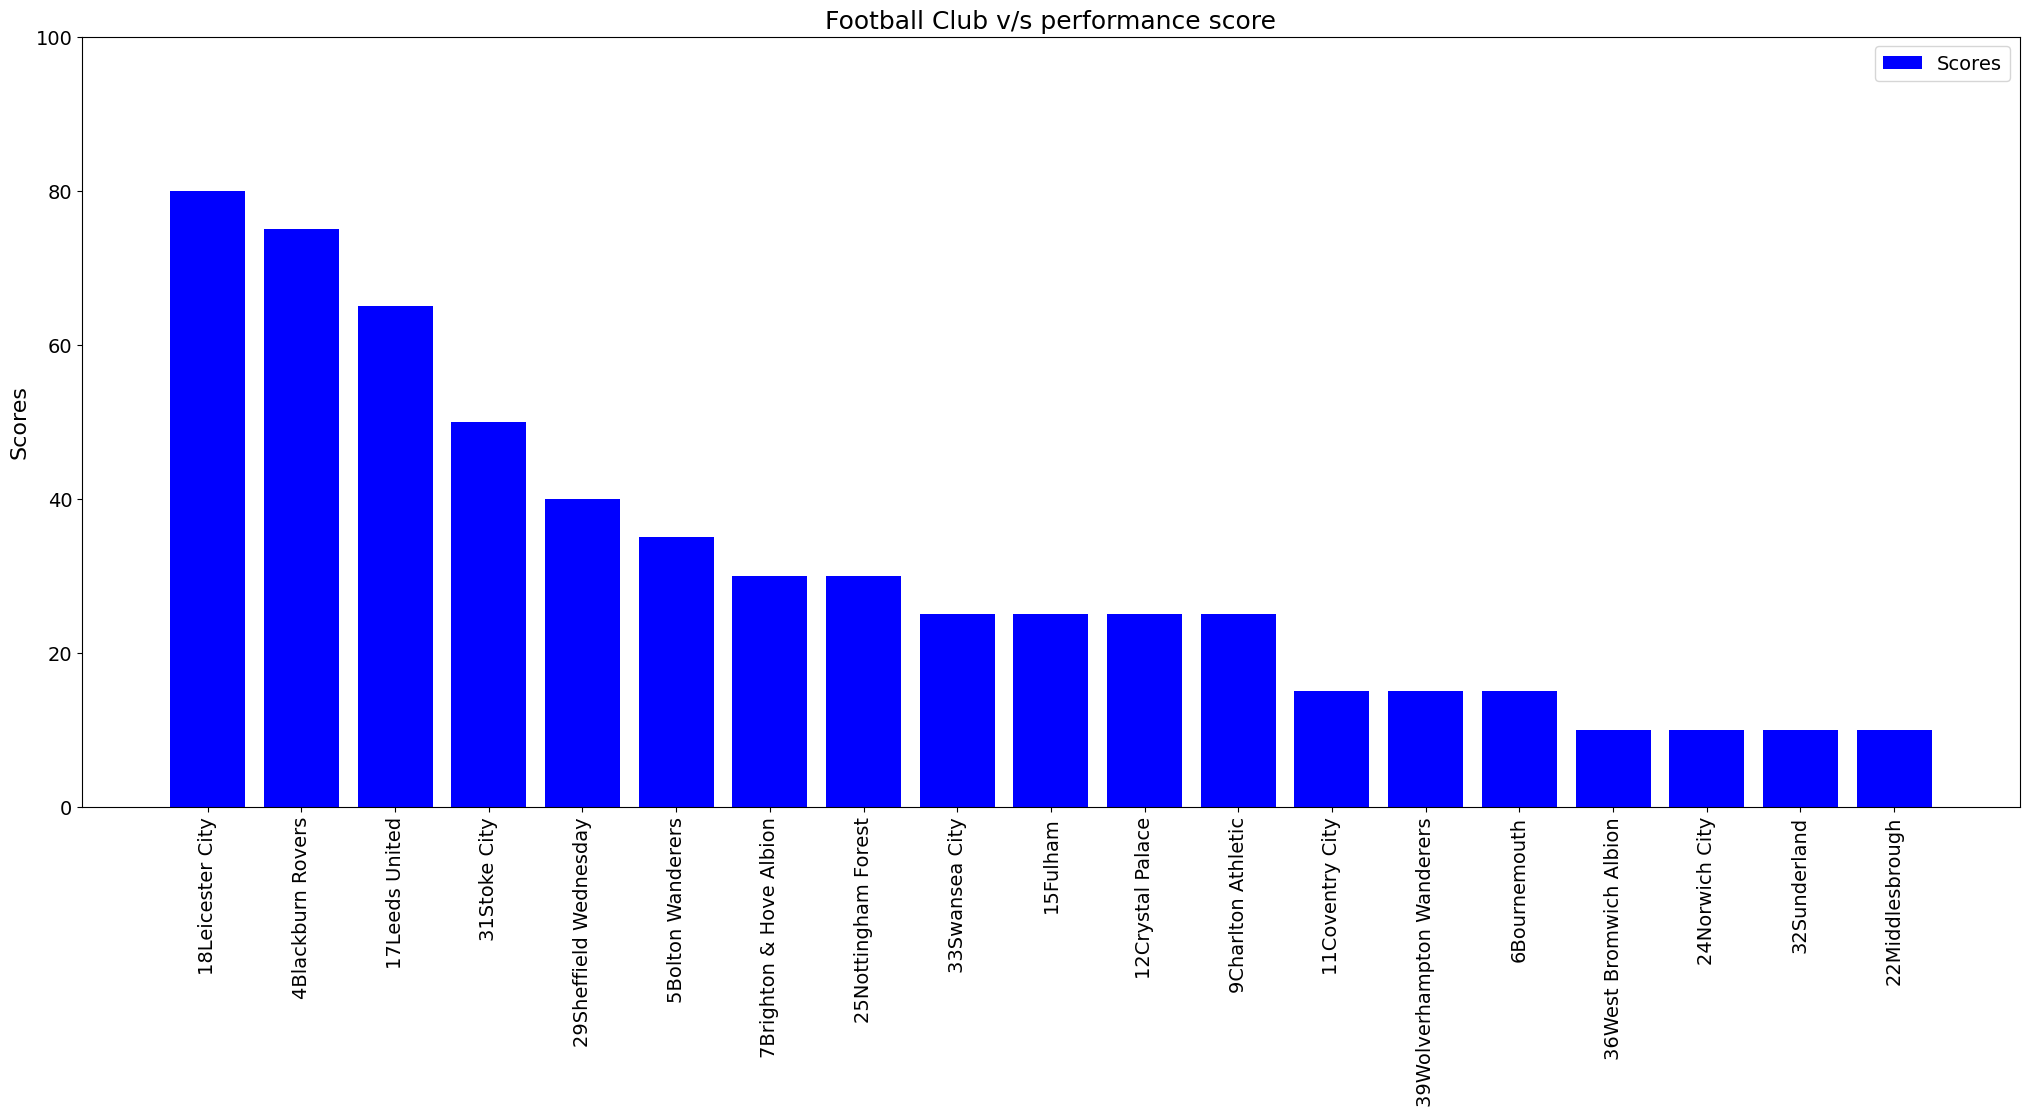

In [52]:
# Sorting the clubs according to scores
df_sort = df.sort_values(by='Scores', ascending=False).head(19)

# Bar chart for team scores
plt.figure(figsize=[25,10])
plt.bar(df_sort["Club"], df_sort["Scores"], color='Blue')

# add labels and title to the chart
plt.ylabel('Scores', fontsize=16)
plt.title('Football Club v/s performance score', fontsize=18)

# add legend to explain the blue bars
plt.legend(['Scores'], fontsize=14)

# rotate the team names on the x-axis for readability
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# set the y-axis limit to start from 0 and end at 100
plt.ylim(0, 100)

# display the chart
plt.show()

**Based on the above chart, Blackburn Rovers has the highest score basis our analysis and next best Leicester City**

To ensure a thorough evaluation of football club performance we must consider clubs current form.

Let us check the score of those clubs that have played in the last three years. Specifically, suggest including clubs that have played in 2023, as well as those that last played in 2022 and 2021. 

This approach allows us to pinpoint those clubs that are currently in good form and have consistently performed well over the past few years.

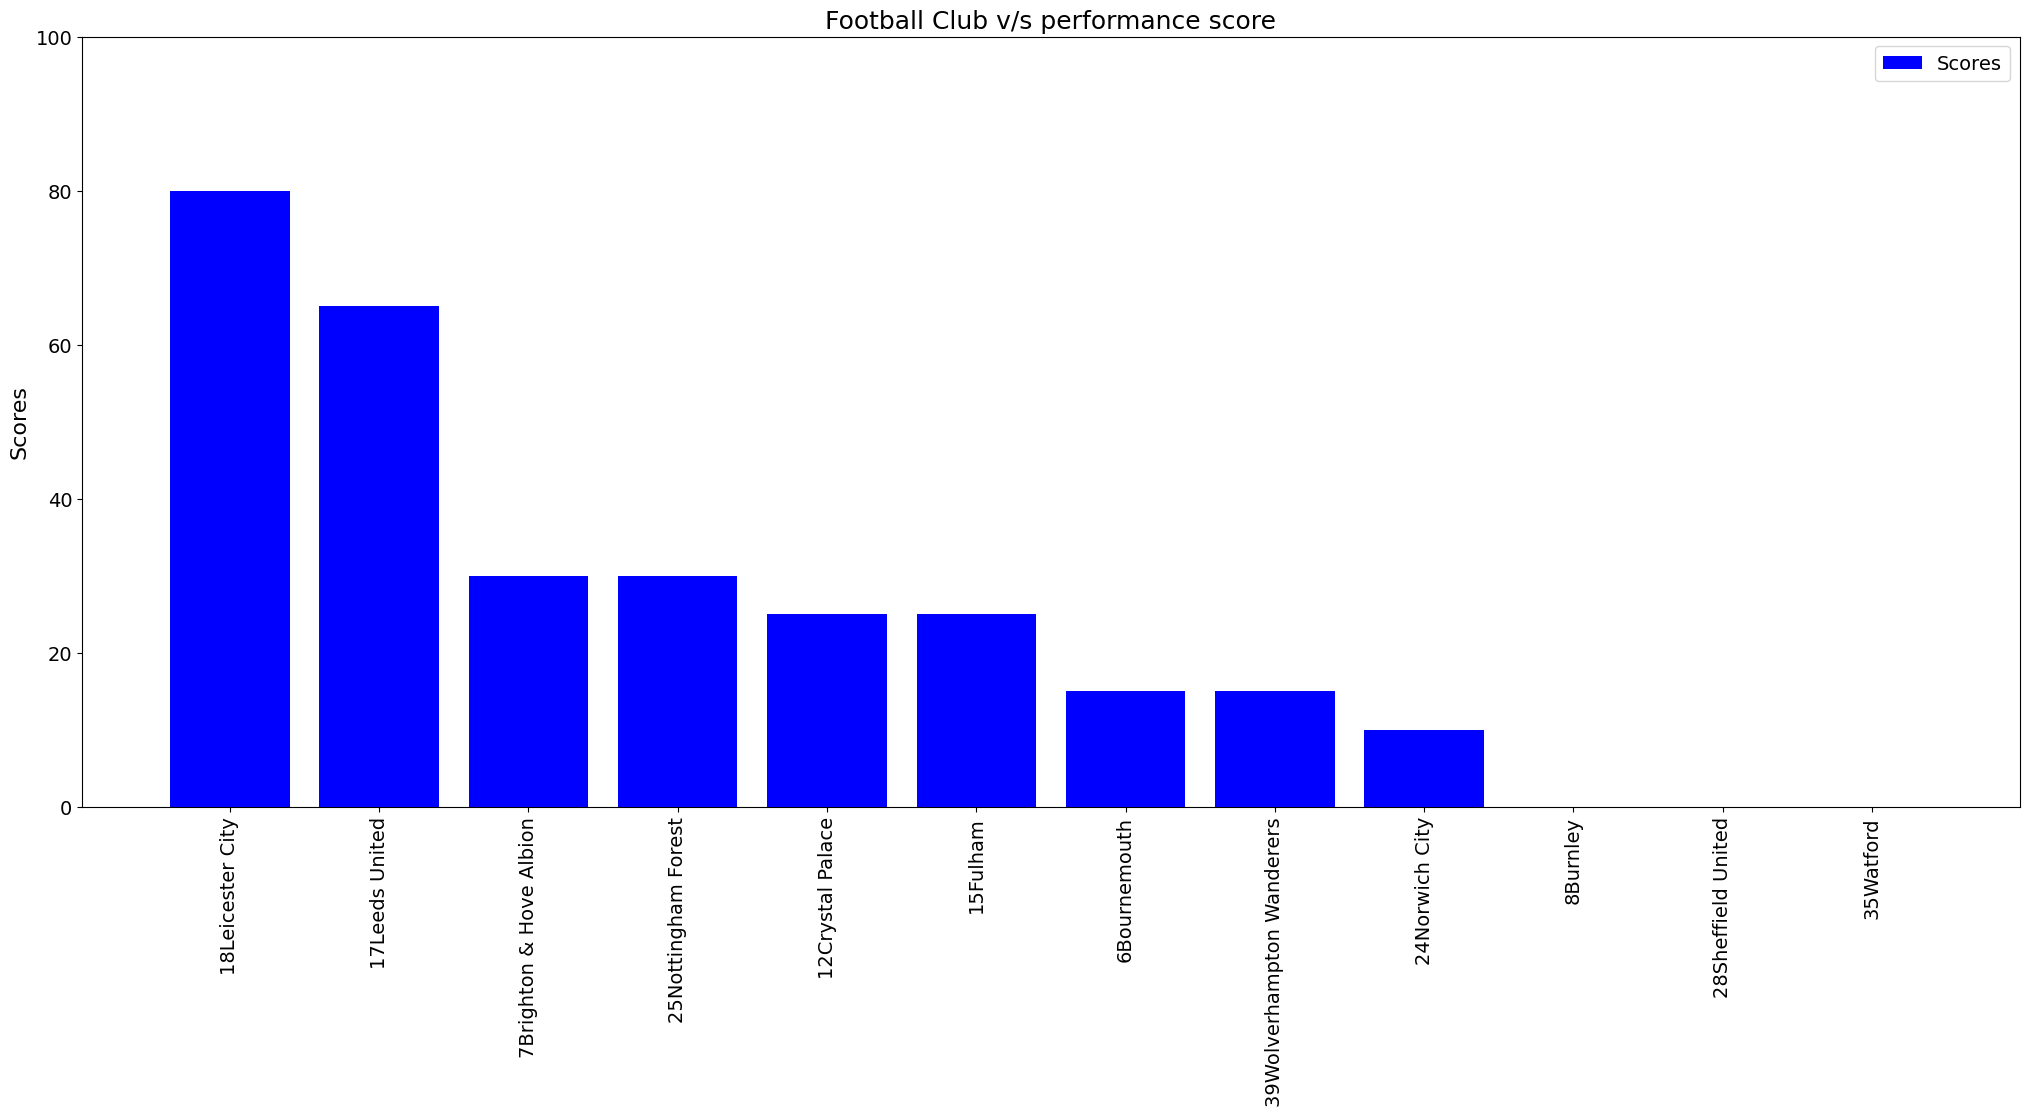

In [53]:
# Sorting the clubs according to scores
df_sort = df[(df["lastplayed_pl"]==2023) | (df["lastplayed_pl"]==2022) | (df["lastplayed_pl"]==2021)].sort_values(by='Scores', ascending=False).head(19)

# Bar chart for team scores
plt.figure(figsize=[25,10])
plt.bar(df_sort["Club"], df_sort["Scores"], color='Blue')

# add labels and title to the chart
plt.ylabel('Scores', fontsize=16)
plt.title('Football Club v/s performance score', fontsize=18)

# add legend to explain the blue bars
plt.legend(['Scores'], fontsize=14)

# rotate the team names on the x-axis for readability
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# set the y-axis limit to start from 0 and end at 100
plt.ylim(0, 100)

# display the chart
plt.show()

Upon closer examination of the list, we can observe that our current leader, Blackburn Rovers, is not included. To gain a better understanding of their performance, it's necessary to investigate further and determine the last year in which Blackburn Rovers played. This information will provide crucial context to our analysis and enable us to assess their recent form accurately. 

In [54]:
df[df["Club"] == "Blackburn Rovers"]["lastplayed_pl"]

Series([], Name: lastplayed_pl, dtype: int32)

Blackburn Rovers last played in the tournament in 2012, which was quite some time ago. Given this information, we recommend that stakeholders consider investing in Leicester City instead. We believe that Leicester City's recent form and performance make them a better choice for investment.

To support our claim, we will conduct further secondary research to provide additional evidence of Leicester City's current form and potential for success

According to our research, Blackburn Rovers were relegated to the Championship league in 2012 i.e., league below Premier League and later to League One in 2017 i.e., league below Championship league. However, they were promoted back to the Championship in 2018 and have since finished in the middle of the table in recent years. Given their inconsistent performance and lack of presence in the Premier League since 2012, it would be inappropriate to recommend this club for investment.

On the other hand, Leicester City, the 2016 Premier League champions, have consistently finished in the top 10 in recent years. They placed 5th in both the 2019-2020 and 2020-2021 seasons and finished 8th in 2021-2022. With sufficient financial backing, Leicester City has the potential to achieve even greater success in the near future. Therefore, it would be reasonable to recommend Leicester City to our clients.

### I recommend investing in Leicester City based on the analysis